In [36]:
# Connor Lewis
# Michael Spearing
# Due: February 7, 2017 17:00

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.linalg import orth
import sympy

In [17]:
# Problem 1: Linear Algebra in Python
v1 = np.array([1,2,3,4])
v2 = np.array([0,1,0,1])
v3 = np.array([1,4,3,6])
v4 = np.array([2,11,6,15])
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
matrix = np.vstack((v1,v2,v3,v4))
#http://docs.sympy.org/dev/tutorial/matrices.html
print("Origional Matrix: \n" + str(matrix))
reduce = sympy.Matrix(matrix).rref()
print("RREF form: \n" + str(reduce))

Origional Matrix: 
[[ 1  2  3  4]
 [ 0  1  0  1]
 [ 1  4  3  6]
 [ 2 11  6 15]]
RREF form: 
(Matrix([
[1, 0, 3, 2],
[0, 1, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0]]), [0, 1])


In [18]:
# Problem 1: Linear Algebra in Python - Question 1
not_in_s = np.array([3,17,6,9])
matrix2 = np.vstack((matrix, not_in_s))
reduce2 = sympy.Matrix(matrix2).rref()
print(reduce2)
#because reduced matrix changed vector not_in_s is not in s
#to check if a vector is in s we would add it to the matrix and see if the 
#reduced matrix equaled the original reduced matrix

(Matrix([
[1, 0, 0,  -12],
[0, 1, 0,    1],
[0, 0, 1, 14/3],
[0, 0, 0,    0],
[0, 0, 0,    0]]), [0, 1, 2])


In [19]:
# Problem 1: Linear Algebra in Python - Question 2
print(np.linalg.matrix_rank(matrix))

2


In [33]:
# Problem 1: Linear Algebra in Python - Question 3
print(orth(np.array([[1,0,3,2],[0,1,0,1]])))

[[-0.98708746 -0.16018224]
 [-0.16018224  0.98708746]]


In [24]:
# Problem 1: Linear Algebra in Python - Question 4
min = "inf"
z_Star = [1,0,0,0]
for(???):
    

1


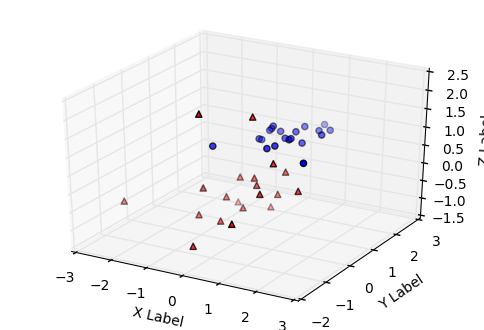

In [87]:
# Problem 2: PCA - Question 1
mean1 = [0,0,0]
n = 20
d = 3
cov_Matrix1 = [[0.5,0,0],[0,0.5,0],[0,0,0.7]]
mean2 = [1,1,1]
cov_Matrix2 = [[0.5,0,0],[0,0.5,0],[0,0,0.01]]

data1 = np.random.multivariate_normal(mean1, cov_Matrix1, n)
data2 = np.random.multivariate_normal(mean2, cov_Matrix2, n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c='r', marker='^')
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
# Problem 2: PCA - Question 2

In [95]:
# Problem 2: PCA - Question 3
data_Agg = np.vstack((data1,data2))
print(data_Agg)
cov = np.cov(data_Agg, rowvar=False)
### ADD in the COVARIANCE CALCULATION
print(cov)

[[ 0.11702268  1.23437132 -1.07750113]
 [ 0.9456385   0.09730877  0.76531671]
 [-0.85353824 -0.27084679 -0.85880771]
 [-0.64608634 -0.49722743  2.02486336]
 [-0.53541452  0.92554428 -0.22744402]
 [ 0.52248802  0.91414447 -0.50417289]
 [-2.71628262 -0.6218816  -0.70311483]
 [-0.23072561 -0.29485341 -0.89931385]
 [-0.09261895 -1.55485998 -1.02649341]
 [-0.12626657  0.44999183 -0.81931248]
 [ 0.63393073  1.06435927  0.08258047]
 [ 1.45851839  0.34754926  0.00717425]
 [ 0.28982588  0.3997257  -0.08228707]
 [ 0.91226572 -1.47436577 -0.23640261]
 [-0.54032288  0.37874299 -0.55951234]
 [ 0.08212092  0.53424539  1.69067442]
 [ 0.86115086 -0.30897654  0.07790215]
 [-0.77698957  1.18587627 -1.09470352]
 [ 0.02186607  0.69335314 -0.05307406]
 [-0.84463888 -0.10317887 -0.17308354]
 [ 0.06883531  0.81348809  0.99211563]
 [ 0.29109099  1.35221673  1.03042416]
 [ 0.80627924  2.40392426  0.91192769]
 [ 0.96343994  0.68997476  1.18202029]
 [ 1.03123072  1.82410427  1.00440116]
 [ 0.79441642  1.02617216

In [102]:
# Problem 2: PCA - Question 4
data_Agg_Square = np.hstack((data_Agg,np.zeros(shape=(40,37))))
#print(np.linalg.matrix_rank(data_Agg_Square))
print(np.linalg.eig(data_Agg_Square))


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.25056895, -0.18576777, -1.70927745]), array([[ 0.        ,  0.        ,  0.        , ..., -0.19796196,
        -0.02098851,  0.23529848],
       [ 0.        ,  0.        ,  0.        , ..., -0.10059387,
         0.02100458, -0.19666977],
       [ 0.        ,  0.        ,  0.        , ...,  0.09301972,
         0.01816456,  0.17351455],
       ..., 
       [ 0.        ,  0.        ,  0.        , ..., -0.03534637,
        -0.23395986,  0.00876396],
       [

In [4]:
# Problem 3: Low Rank Approximation of Mona Lisa (Connor)

In [ ]:
# Problem 4: Starting in Kaggle (Michael)